 # TP3. Tuning models 
 
 #### University Jean-Monnet, 2019-2020

## Part 1. Cifar Dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization,  GlobalAveragePooling2D
from keras.layers import Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling2D, MaxPooling1D, Embedding
from keras import optimizers
from keras.models import Model

Using TensorFlow backend.


train data:	 (50000, 32, 32, 3) (50000, 1)
test data:	 (10000, 32, 32, 3) (10000, 1)


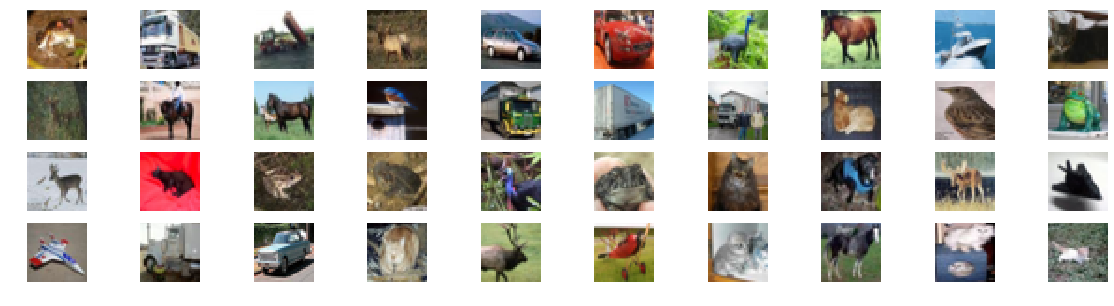

labels:  [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]
 [4]
 [3]
 [6]
 [6]
 [2]
 [6]
 [3]
 [5]
 [4]
 [0]
 [0]
 [9]
 [1]
 [3]
 [4]
 [0]
 [3]
 [7]
 [3]
 [3]]


In [2]:
from keras.datasets import cifar10

cifar = cifar10.load_data()

(x_train, y_train), (x_test, y_test) = cifar
X_train_original = x_train
X_test_original = x_test
y_train_original = y_train
y_test_original = y_test
print('train data:\t', x_train.shape, y_train.shape)
print('test data:\t', x_test.shape, y_test.shape)

plt.figure(figsize=(20,5))
for i in range(40):
    plt.subplot(4, 10, i+1)
    example = x_train[i]
    plt.imshow(example)
    plt.axis('off')
plt.show()
print('labels: ', y_train[:40])
y_train = to_categorical(y_train_original, 10)
y_test = to_categorical(y_test_original, 10)


In [0]:
x_train = X_train_original
x_test = X_test_original

x_train = x_train.astype('float32')
x_train/=255
x_test = x_test.astype('float32')
x_test/=255

# convert class vectors to binary class matrices
batch_size = 32
epochs = 20
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same',  input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])
# print(model.summary())
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W1019 20:05:05.042732 140488357500800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 53s 1ms/step - loss: 1.7485 - acc: 0.4606 - val_loss: 1.2968 - val_acc: 0.5661
Epoch 2/20
50000/50000 [==============================] - 52s 1ms/step - loss: 1.0581 - acc: 0.6435 - val_loss: 0.9591 - val_acc: 0.6704
Epoch 3/20
50000/50000 [==============================] - 54s 1ms/step - loss: 0.8403 - acc: 0.7083 - val_loss: 0.7980 - val_acc: 0.7216
Epoch 4/20
50000/50000 [==============================] - 55s 1ms/step - loss: 0.7272 - acc: 0.7457 - val_loss: 0.7659 - val_acc: 0.7335
Epoch 5/20
50000/50000 [==============================] - 55s 1ms/step - loss: 0.6526 - acc: 0.7736 - val_loss: 0.8203 - val_acc: 0.7247
Epoch 6/20
50000/50000 [==============================] - 56s 1ms/step - loss: 0.5915 - acc: 0.7936 - val_loss: 0.6237 - val_acc: 0.7827
Epoch 7/20
50000/50000 [==============================] - 55s 1ms/step - loss: 0.5467 - acc: 0.8096 - val_loss: 0.6020 - val_acc

**Problem 1. Try all new techniques to improve the results**

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
x_train = X_train_original
x_test = X_test_original

x_train = x_train.astype('float32')
x_train/=255
x_test = x_test.astype('float32')
x_test/=255

# convert class vectors to binary class matrices
batch_size = 32
epochs = 20
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same',  input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])
# print(model.summary())
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[es, reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 59s 1ms/step - loss: 1.6854 - acc: 0.4778 - val_loss: 1.3011 - val_acc: 0.5573
Epoch 2/20
50000/50000 [==============================] - 57s 1ms/step - loss: 1.0215 - acc: 0.6514 - val_loss: 1.1596 - val_acc: 0.5916
Epoch 3/20
50000/50000 [==============================] - 56s 1ms/step - loss: 0.8292 - acc: 0.7112 - val_loss: 0.7046 - val_acc: 0.7505
Epoch 4/20
50000/50000 [==============================] - 56s 1ms/step - loss: 0.7183 - acc: 0.7503 - val_loss: 0.7928 - val_acc: 0.7238
Epoch 5/20
50000/50000 [==============================] - 57s 1ms/step - loss: 0.6435 - acc: 0.7759 - val_loss: 0.6912 - val_acc: 0.7605
Epoch 6/20
50000/50000 [==============================] - 56s 1ms/step - loss: 0.5885 - acc: 0.7954 - val_loss: 0.6415 - val_acc: 0.7826
Epoch 7/20
50000/50000 [==============================] - 57s 1ms/step - loss: 0.5405 - acc: 0.8097 - val_loss: 0.5495 - val_acc

In [3]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
x_train = X_train_original
x_test = X_test_original

x_train = x_train.astype('float32')
x_train/=255
x_test = x_test.astype('float32')
x_test/=255

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)
# convert class vectors to binary class matrices
batch_size = 32
epochs = 20
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same',  input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])
# print(model.summary())
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test), callbacks=[es, reduce_lr])

model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
          steps_per_epoch=x_train.shape[0] // batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[es, reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1562/1562 [==============================] - 52s 34ms/step - loss: 0.6150 - acc: 0.7866 - val_loss: 0.5618 - val_acc: 0.8132
Epoch 13/20
1562/1562 [==============================] - 52s 33ms/step - loss: 0.6038 - acc: 0.7936 - val_loss: 0.6405 - val_acc: 0.7866
Epoch 14/20
1562/1562 [==============================] - 53s 34ms/step - loss: 0.5884 - acc: 0.7948 - val_loss: 0.5703 - val_acc: 0.8110
Epoch 15/20
1562/1562 [==============================] - 53s 34ms/step - loss: 0.5784 - acc: 0.7990 - val_loss: 0.5283 - val_acc: 0.8224
Epoch 16/20
1562/1562 [==============================] - 53s 34ms/step - loss: 0.5624 - acc: 0.8065 - val_loss: 0.5403 - val_acc: 0.8174
Epoch 17/20
1562/1562 [==============================] - 54s 34ms/step - loss: 0.5558 - acc: 0.8070 - val_loss: 0.5652 - val_acc: 0.8093
Epoch 18/20
1562/1562 [==============================] - 54s 34ms/step - loss: 0.5449 - acc: 0.8112 - val_loss: 0.5572 - val_acc: 0.8162
Epoch 19/20
1562/1562 [==============================

**Problem 2. Use pretrained models, objective: 91%**

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
k = 15
for layer in conv_base.layers:
   layer.trainable = False



In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [19]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])
# from keras.optimizers import SGD
# model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose = 1)
print(model.summary())

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 597s 12ms/sample - loss: 0.2582 - acc: 0.9083 - val_loss: 0.3352 - val_acc: 0.9000
Epoch 2/5
50000/50000 [==============================] - 590s 12ms/sample - loss: 0.2001 - acc: 0.9258 - val_loss: 0.3345 - val_acc: 0.9000
Epoch 3/5
50000/50000 [==============================] - 589s 12ms/sample - loss: 0.1767 - acc: 0.9339 - val_loss: 0.3374 - val_acc: 0.9000
Epoch 4/5
50000/50000 [==============================] - 589s 12ms/sample - loss: 0.1588 - acc: 0.9409 - val_loss: 0.3451 - val_acc: 0.9000
Epoch 5/5
50000/50000 [==============================] - 590s 12ms/sample - loss: 0.1457 - acc: 0.9459 - val_loss: 0.3394 - val_acc: 0.9000
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_21 (UpSampling multiple                  0         
______________________________